In [1]:
import os

os.chdir("../../")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_handling import ingestion

sns.set_theme(context="paper", font_scale=1.15, style="whitegrid")

In [5]:
ncg_consumption, gaspool_consumption, the_consumption = ingestion.read_consumption()
consumption_data = pd.concat([ncg_consumption + gaspool_consumption, the_consumption]).dropna()

In [6]:
consumption_data

2016-10-01    1659034.269
2016-10-02    1740912.553
2016-10-03    1916761.578
2016-10-04    2255390.622
2016-10-05    2511773.431
                 ...     
2023-03-01    4010980.998
2023-03-02    3885627.371
2023-03-03    3730179.834
2023-03-04    1841878.128
2023-03-05    1916312.256
Length: 2347, dtype: float64

### Autocorrelation / Seasonality

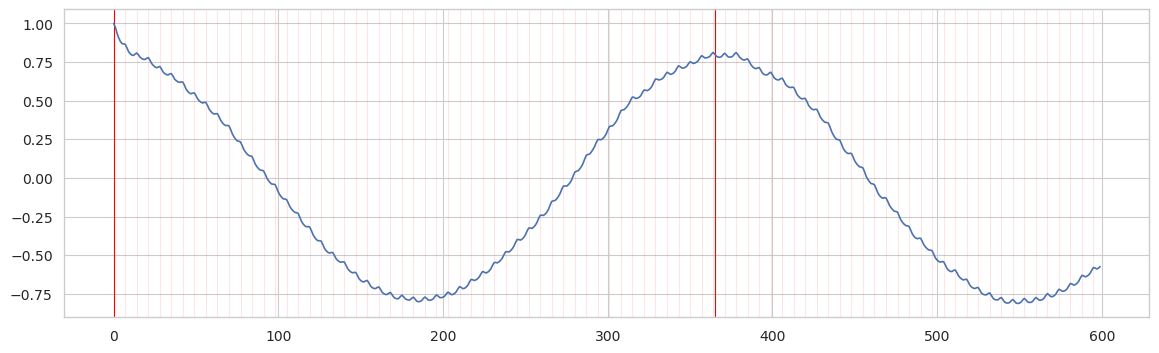

In [37]:
coefficients = []

for lag in range(0, 600):
    coefficients.append(consumption_data.corr(consumption_data.shift(periods=lag)))

fig, ax = plt.subplots(figsize=(14, 4))

# Vertical line at all days divisible by 7
for i in range(0, 600, 7):
    ax.axvline(x=i, color="red", alpha=0.1, linewidth=0.8)

# Vertical line at all days divisible by 365
for i in range(0, 600, 365):
    ax.axvline(x=i, color="red", alpha=1, linewidth=0.8)

ax.plot(range(0, 600), coefficients)

# Result: There is a strong correlation between the same day of the week and the same day of the year but not between the same day of the month

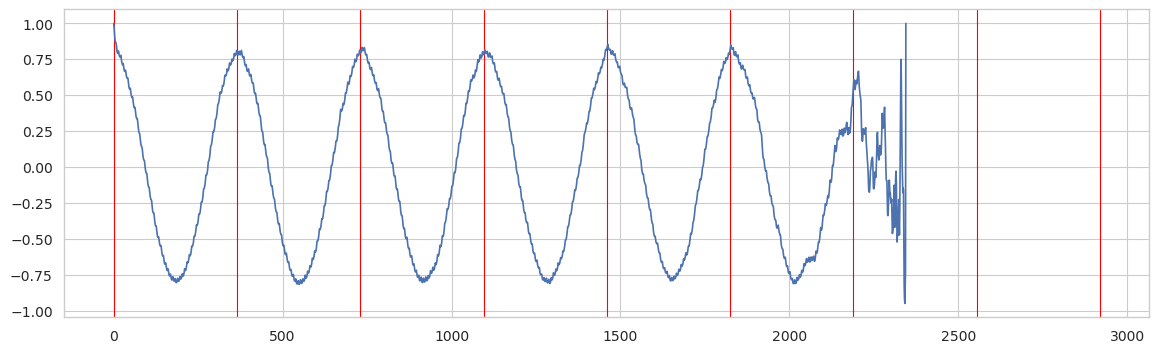

In [39]:
coefficients = []

for lag in range(0, 3000):
    coefficients.append(consumption_data.corr(consumption_data.shift(periods=lag)))

fig, ax = plt.subplots(figsize=(14, 4))

# Vertical line at all days divisible by 365
for i in range(0, 3000, 365):
    ax.axvline(x=i, color="red", alpha=1, linewidth=0.8)

ax.plot(range(0, 3000), coefficients)

# How to explain the end of this? -> the coefficient quality deteriorates as the lag increases since the data becomes less and less

### Trends

In [48]:
x = range(consumption_data.shape[0])
y = consumption_data.to_numpy()

In [53]:
# Cut data to only include full years (mitigating risk of seasonality affecting trend estimation)
x = x[0 : (len(x) // 365) * 365]
y = y[0 : (len(y) // 365) * 365]

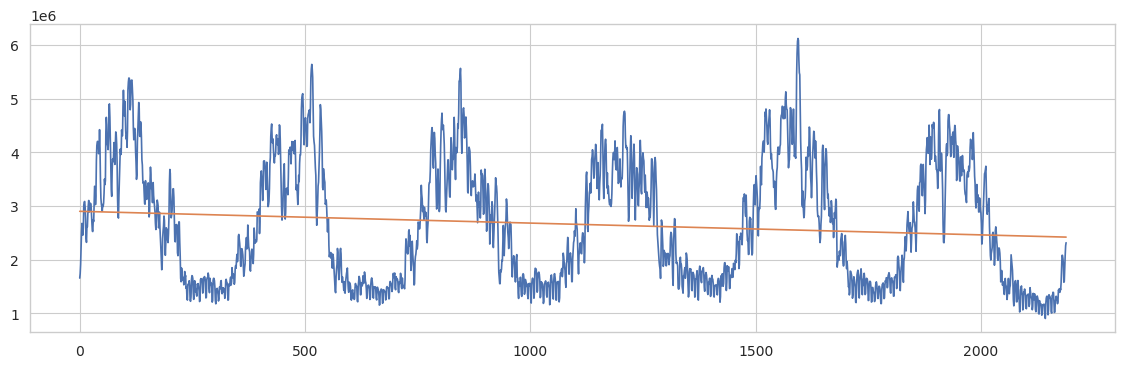

In [54]:
from scipy import stats
linear_regression = stats.linregress(x, y)

# Plot data and linear regression
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(x, y, label="Data")
ax.plot(x, linear_regression.intercept + linear_regression.slope * x, label="Linear regression")

### Decomposition

Decomposition in level, seasonality, trend and noise component